<a href="https://colab.research.google.com/github/sambalangaooo/Exploratory-Data-Analysis-Titanic-Data-Set/blob/main/BALANGAO_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BALANGAO, Samantha A. (BSCpE 3-2)
#Exploratory Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('Titanic-Dataset.csv')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


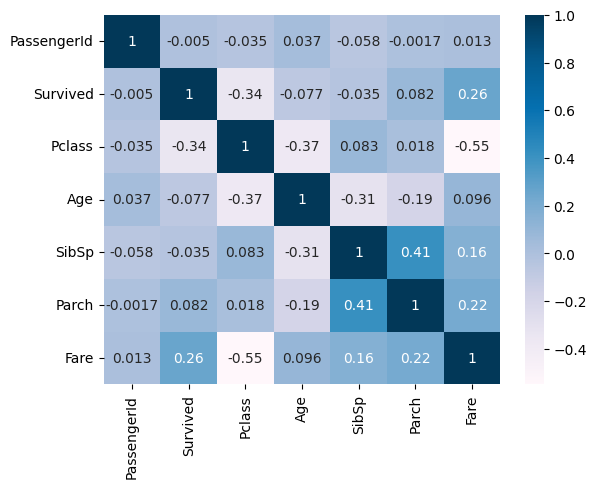

In [ ]:
#Using a heatmap, we can visualize the correlation of the NUMERICAL columns to each other.
df_num = df.select_dtypes(include=['number'])
sns.heatmap(df_num.corr(),
            annot=True,
            cmap='PuBu')
plt.show()

In [ ]:
#Using describe(), we are able to get a summary of descriptive analytics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#1. How many survived the Titanic sinking?
#Calculating the total number of survivors and non-survivor in the column 'Survived'.
survived_count = df['Survived'].value_counts()

#Using a table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Survival Status', 'Count'],
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[['Did Not Survive', 'Survived'],  # Survival Status
                       [survived_count[0], survived_count[1]]],  # Counts
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title_text="Titanic Survival Count Table")
fig.show()

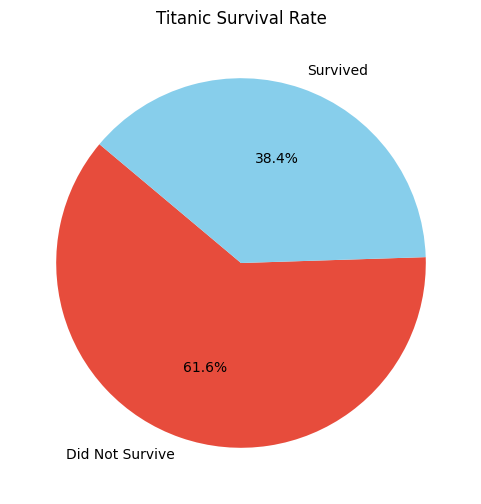

In [ ]:
#1.1. What is the survival rate of the titanic?
#Calculating the total number of survivors and non-survivor in the column 'Survived'.
survived_count = df['Survived'].value_counts()

#Using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_count, labels=['Did Not Survive', 'Survived'], colors=['#e74c3c', 'skyblue'], autopct='%1.1f%%', startangle=140)
plt.title('Titanic Survival Rate')
plt.show()

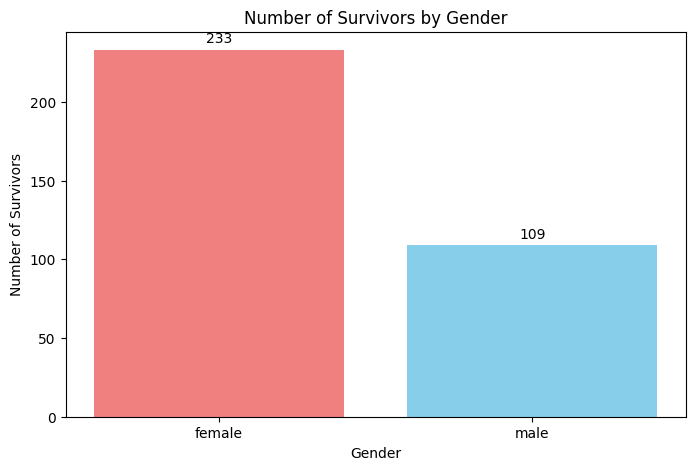

In [ ]:
#2. Based on sex (gender), which had more survivors?
#Calculating the number of survivors grouped by Sex
gender_survivors = df[df['Survived'] == 1].groupby('Sex')['Survived'].count()

#Using bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(gender_survivors.index,
              gender_survivors.values,
              color=['lightcoral','skyblue' ])
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Survivors')
ax.set_title('Number of Survivors by Gender')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

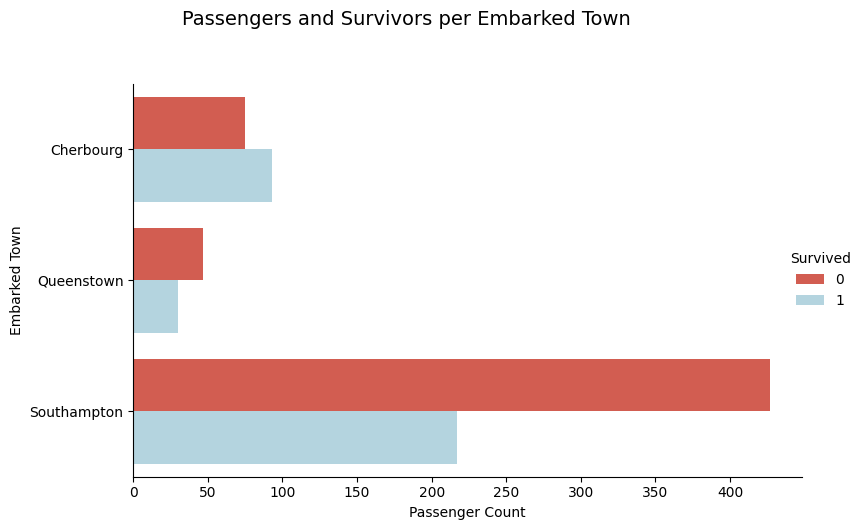

In [ ]:
#3. From which town did most people came from? and how many survivors are there per town?
#Calculating the count for Survivors per Embarked Town
embarked_survivors = df.groupby(['Embarked', 'Survived'])['Survived'].count().reset_index(name='Count')
embarked_survivors.columns = ['Embarked', 'Survived', 'Count']
embarked_survivors['Embarked Town'] = embarked_survivors['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

#Using horizontal barchart
town = sns.catplot(
    data=embarked_survivors,
    kind='bar',
    y='Embarked Town',
    x='Count',
    hue='Survived',
    palette={0: '#e74c3c', 1: 'lightblue'},
    height=5,
    aspect=1.5)

town.set_axis_labels("Passenger Count", "Embarked Town")
town._legend.set_title("Survived")
town._legend.set_bbox_to_anchor((1.05, 0.5))
town.fig.suptitle('Passengers and Survivors per Embarked Town', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

<ipython-input-3-596c16595ece>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate,


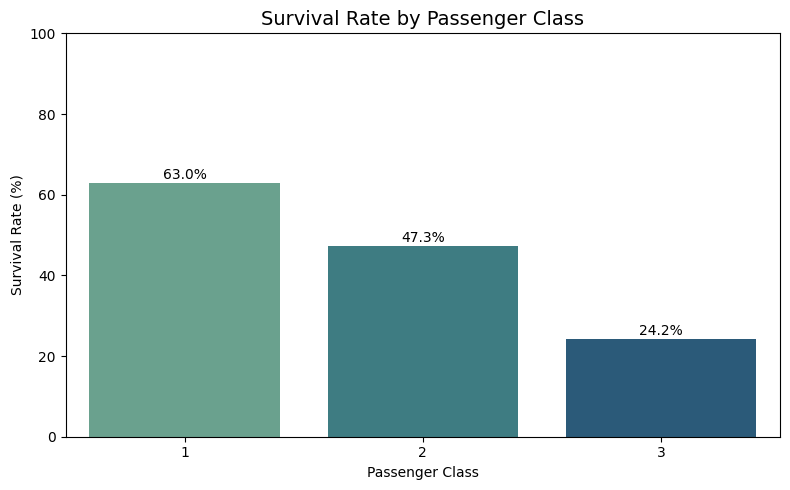

In [ ]:
#4. Are there more number of survivors across particular passenger classes (1, 2, 3)?

#Calculating the total number of passengers, then survivors per class
class_total = df.groupby('Pclass')['Survived'].count()
class_survivors = df[df['Survived'] == 1].groupby('Pclass')['Survived'].count()

#Calculating the survival rate
survival_rate = (class_survivors / class_total * 100).reset_index(name='Survival Rate')

#Using a bargraph
plt.figure(figsize=(8, 5))
sns.barplot(data=survival_rate,
            x='Pclass',
            y='Survival Rate',
            palette='crest')

for index, row in survival_rate.iterrows():
    plt.text(index, row['Survival Rate'] + 1, f"{row['Survival Rate']:.1f}%", ha='center')

plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
#5. What is the average age of the survivors?
avg_age = df[df['Survived'] == 1]['Age'].mean()
print(f"The average age of the survivors is: {avg_age:.2f} years")

The average age of the survivors is: 28.34 years


<ipython-input-7-601b4b2f69a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette={'0': '#e74c3c', '1': 'skyblue'})


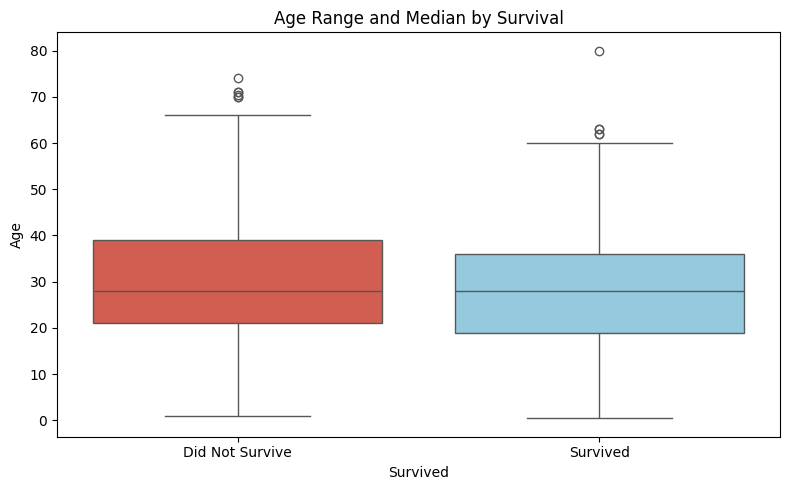

In [ ]:
#5.1. How does the age distribution differ between survivors and non-survivors?
#Using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Age', palette={'0': '#e74c3c', '1': 'skyblue'})
plt.title('Age Range and Median by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()